# importing libraries



In [41]:
                                                                                                                                                                                                                                                                                                                                                    import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Reading the dataset

In [42]:
malData=pd.read_csv('MalwareData.csv',sep='|',low_memory=True)
malData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [43]:
malData.shape

(138047, 57)

In [44]:
Y=malData['legitimate']
Y.value_counts()


0    96724
1    41323
Name: legitimate, dtype: int64

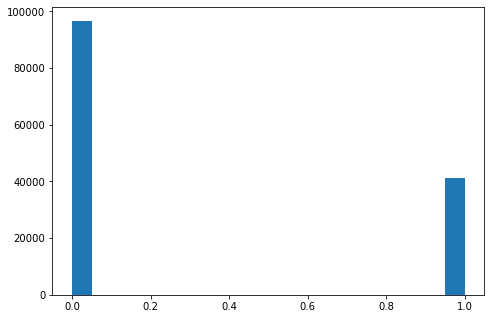

In [45]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.hist(malData["legitimate"],20)
plt.show()

# Data Processing

In [46]:
X=malData.drop(['legitimate','Name','md5'],axis=1)

In [47]:
X.shape

(138047, 54)

In [48]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
121748,332,224,258,11,0,193024,132608,0,109585,4096,...,0,11,3.816872,2.303578,5.231432,2346.272727,132,9640,72,0
21308,332,224,8450,8,0,126976,49152,0,38583,4096,...,409,2,4.187227,3.288789,5.085664,498.000000,340,656,72,15
22770,332,224,8462,7,10,6656,4096,0,9095,4096,...,1,5,3.624229,2.980611,4.918510,485.200000,234,900,0,16
122938,332,224,258,10,0,119808,385024,0,61532,4096,...,0,6,3.752798,2.458492,5.317552,2738.833333,48,9640,72,15
136182,332,224,33167,2,25,278528,4096,667648,949008,671744,...,0,19,7.222760,3.750000,7.660458,886.210526,16,2720,0,0


In [49]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)



In [50]:
x_train.shape

(110437, 54)

# Model Creation 

In [51]:
#Number of Features
input_size = 54

#Number of Outputs
output_size = 2

hidden_layer_size = 80
    
# define how the model will look like
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, input_shape=(input_size,), activation='relu'), # 1st hidden layer
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='softmax') # output layer
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 80)                4400      
                                                                 
 dense_15 (Dense)            (None, 80)                6480      
                                                                 
 dense_16 (Dense)            (None, 80)                6480      
                                                                 
 dense_17 (Dense)            (None, 80)                6480      
                                                                 
 dense_18 (Dense)            (None, 80)                6480      
                                                                 
 dense_19 (Dense)            (None, 80)                6480      
                                                                 
 dense_20 (Dense)            (None, 2)                

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#configuring model for training
#sparse crossentropy produces a category index of the most likely matching category
#adam = adaptive movement. Effective when working with large data, memory efficient 

In [53]:
# set the batch size
batch_size = 100

# set a maximum number of training cycles
#epochs indicate the number of passes of the entire training dataset the ml algorithm has completed
max_epochs = 20

# set an early stopping mechanism
# let's set patience=2, to be a bit tolerant against random validation loss increases
early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)
#if any 3 epochs have same value, so it stops executing

# Training

In [54]:

result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=max_epochs,
                   verbose=1,
                   #callbacks=[early_stopping],
                   validation_split=0.2)


Epoch 1/20


/home/vishwanath/.local/lib/python3.10/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


884/884 [==============================] - 7s 6ms/step - loss: 0.0623 - accuracy: 0.9815 - val_loss: 0.0333 - val_accuracy: 0.9890
Epoch 2/20
884/884 [==============================] - 5s 6ms/step - loss: 0.0343 - accuracy: 0.9890 - val_loss: 0.0318 - val_accuracy: 0.9898
Epoch 3/20
884/884 [==============================] - 5s 6ms/step - loss: 0.0330 - accuracy: 0.9897 - val_loss: 0.0298 - val_accuracy: 0.9905
Epoch 4/20
884/884 [==============================] - 5s 6ms/step - loss: 0.0290 - accuracy: 0.9902 - val_loss: 0.0282 - val_accuracy: 0.9910
Epoch 5/20
884/884 [==============================] - 5s 6ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0301 - val_accuracy: 0.9899
Epoch 6/20
884/884 [==============================] - 5s 6ms/step - loss: 0.0261 - accuracy: 0.9913 - val_loss: 0.0271 - val_accuracy: 0.9904
Epoch 7/20
884/884 [==============================] - 5s 6ms/step - loss: 0.0249 - accuracy: 0.9917 - val_loss: 0.0273 - val_accuracy: 0.9904
Epoch 8/20
884/88

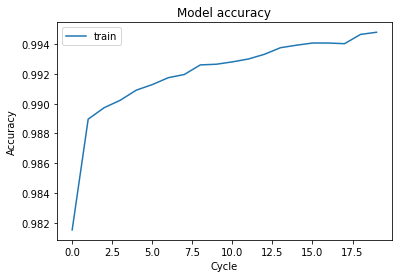

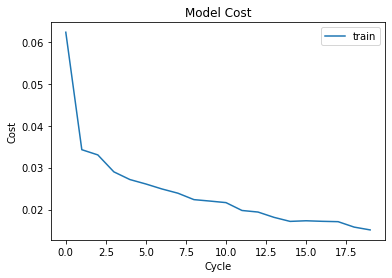

In [55]:
# Visualize the result
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Cycle')
plt.show()
plt.plot(result.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Cycle')
plt.show()

In [56]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))
#evaluate tells us about accuracy and total loss

863/863 [==============================] - 2s 3ms/step - loss: 0.1311 - accuracy: 0.9839

Test loss: 0.131097. Test accuracy: 98.388267%


In [57]:
#to increase the accuracy we train the model again 
result = model.fit(x=x_train,
                   y=y_train,
                   batch_size=batch_size,
                   epochs=30,
                   verbose=1,
                   initial_epoch=10, #start from epoch 11
                   callbacks=[early_stopping], #prevent overfitting
                   validation_split=0.2)

Epoch 11/30
884/884 [==============================] - 5s 6ms/step - loss: 0.0143 - accuracy: 0.9951 - val_loss: 0.0276 - val_accuracy: 0.9915
Epoch 12/30
884/884 [==============================] - 5s 6ms/step - loss: 0.0146 - accuracy: 0.9951 - val_loss: 0.0293 - val_accuracy: 0.9922
Epoch 13/30
884/884 [==============================] - 5s 6ms/step - loss: 0.0137 - accuracy: 0.9954 - val_loss: 0.0325 - val_accuracy: 0.9930


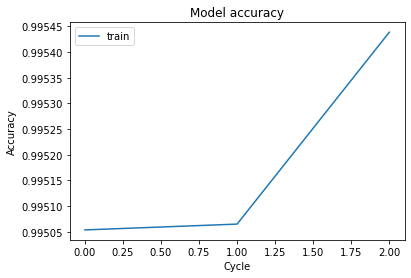

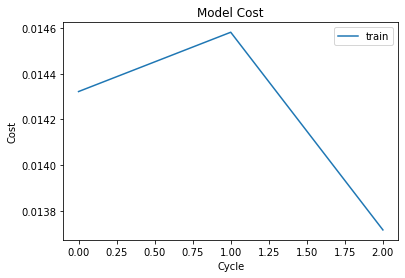

In [58]:
# Visualize the result
plt.plot(result.history['accuracy'], label='train')
plt.legend(loc='upper left')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Cycle')
plt.show()
plt.plot(result.history['loss'], label='train')
plt.legend(loc='upper right')
plt.title('Model Cost')
plt.ylabel('Cost')
plt.xlabel('Cycle')
plt.show()

In [59]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('\nTest loss: {0:.6f}. Test accuracy: {1:.6f}%'.format(test_loss, test_accuracy*100.))


863/863 [==============================] - 2s 3ms/step - loss: 0.1995 - accuracy: 0.9781

Test loss: 0.199530. Test accuracy: 97.808766%


In [60]:
import pickle
pickle.dump(model,open('model8.pkl','wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
......dense_3
.........vars
............0
............1
......dense_4
.........vars
............0
............1
......dense_5
.........vars
............0
............1
......dense_6
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
.........2
.........20
.........21
.........22
.........23
.........24
.........25
.........26
.........27
.........28
.........3
.........4
.........5
.........6
.........7
.........8
.........9
...vars
Keras model archive saving:
File